<a href="https://colab.research.google.com/github/Hyprnx/Data-Preparation/blob/main/Homeworks/HW_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DA dữ liệu, xử lý dữ liệu dạng text, category, xử lý outlierm chạy thuật toán LR, KNN (tune tham số k), SVM (tune tham số kernel, C) cho dữ liệu:

https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

https://www.kaggle.com/goyalshalini93/car-price-prediction-linear-regression-rfe/data


In [1]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, mean_squared_error, r2_score
from sklearn.svm import SVC
from sklearn import metrics
from google.colab import files



In [3]:
plotly.offline.init_notebook_mode(connected=True)

In [27]:
wine = pd.read_csv('/content/gdrive/MyDrive/Colab_workspaces/HW_Visualization/W8/winequality-red.csv')
cars = pd.read_csv('/content/gdrive/MyDrive/Colab_workspaces/HW_Visualization/W8/CarPrice_Assignment.csv')

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
# inspect wine data
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


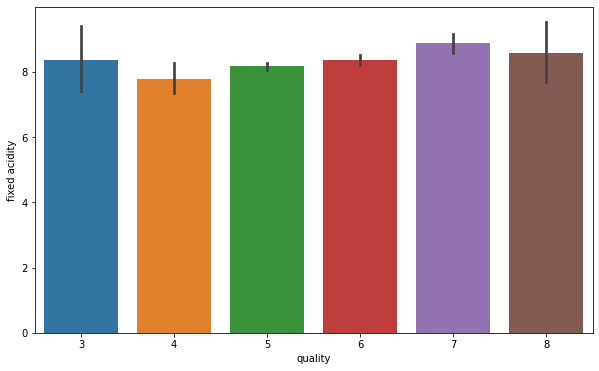

In [7]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = wine)

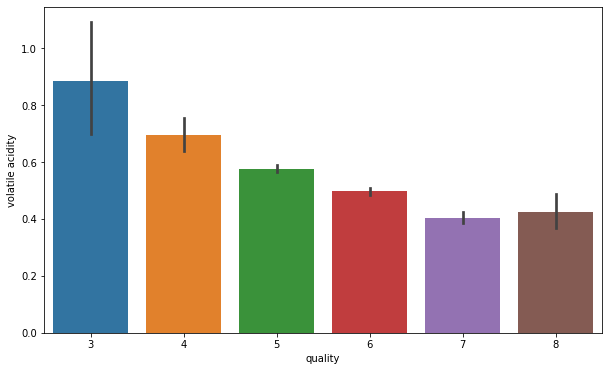

In [8]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = wine)

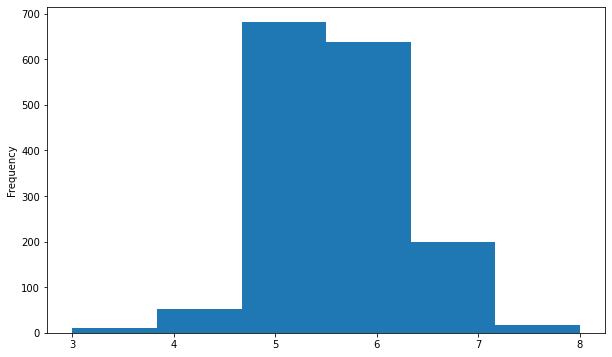

In [9]:
fig = plt.figure(figsize = (10,6))
wine['quality'].plot(kind='hist', bins=6)

In [10]:
def wine_linear_regression(data):
    print('                LINEAR REGRESSION MODEL                ')
    print('-------------------------------------------------------')
    # split data, with y as quality as X is the rest of the data
    X = data.drop('quality', axis = 1)
    y = data['quality']
    
    # split data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    print('Dimension after spliting: ',X_train.shape, X_test.shape)
    
    # initialize Regresion
    lm = LinearRegression()

    # fitting data
    lm.fit(X_train,y_train)
    pred_lm = lm.predict(X_test)

    # Metrics
    print('MAE:', metrics.mean_absolute_error(y_test, pred_lm))
    print('MSE:', metrics.mean_squared_error(y_test, pred_lm))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred_lm)))
    print('R-Squared: ',lm.score(X_train, y_train))

    print('-------------------------------------------------------\n')
    

In [11]:
def wine_logistic_regression(data):
    print('                LOGISTICS REGRESSION MODEL             ')
    print('-------------------------------------------------------')
    # devide data into 2 part, good and bad
    bins = (2, 5.5, 8)
    group_names = ['bad', 'good']

    # split data and quality
    X = data.drop('quality', axis = 1)
    y = data['quality']

    # cut data into 2 half
    y = pd.cut(y, bins = bins, labels = group_names)


    # from 2 to 5 as bad, 6 to 8 as good
    # bad as 0 good as 1
    label_quality = LabelEncoder()
    y = label_quality.fit_transform(y)

    # split train test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # scale data into number
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)


    lr = LogisticRegression()
    lr.fit(X_train, y_train)
    pred_lr = lr.predict(X_test)

    print(classification_report(y_test, pred_lr))
    print('-------------------------------------------------------\n')


In [21]:
 def wine_knn(data, k_class=10):
    print('                 K NEAREST NEIGHBOR MODEL              ')
    print('-------------------------------------------------------')
    # split data into data and class
    X = data.drop('quality', axis = 1)
    y = data['quality']

    # split into train and test data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

    # try to split data into different number of classes
    knn = KNeighborsClassifier
    
    # test accuracy for each number of class
    accuracy_score = []
    for i in range(2, k_class + 1):
        classify = knn(n_neighbors=i)
        classify.fit(X_train, y_train)
        pred = classify.predict(X_test)
        accuracy = metrics.accuracy_score(y_test, pred)
        accuracy_score.append(accuracy)
        if i % 5 == 0:
            print(f'Accuracy when try {i} class: {accuracy}')
    
    # show accuracy chart overtime
    plt.plot(accuracy_score)
    plt.show()
    print(f'The model with the best accuracy is: %.3f {max(accuracy_score)}')
    print('-------------------------------------------------------\n')


In [25]:
def wine_svm(data):
    print('                        SVM MODEL                      ')
    print('-------------------------------------------------------')
    # split data into data and class
    X = data.drop('quality', axis = 1)
    y = data['quality']

    # Create training and test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # scale data
    sc = StandardScaler()
    sc.fit(X_train)
    X_train_std = sc.transform(X_train)
    X_test_std = sc.transform(X_test)

    
    C = [0.1, 1, 10, 100]
    kernels = ['linear', 'poly', 'rbf', 'sigmoid']
    print(f'                  ')
    for kernel in kernels:
        print(f'        {kernel}          ')
        accuracy = []
        for c in C:
            svc = SVC(C = c, random_state=1, kernel=kernel)
            # fit the model
            svc.fit(X_train_std, y_train)
            y_predict = svc.predict(X_test_std)
            # Measure the performance
            print("Accuracy score: %.3f" %metrics.accuracy_score(y_test, y_predict))
            accuracy.append(metrics.accuracy_score(y_test, y_predict))
        plt.plot(accuracy, label=kernel)
        plt.legend()


                LINEAR REGRESSION MODEL                
-------------------------------------------------------
Dimension after spliting:  (1119, 11) (480, 11)
MAE: 0.5133956082451124
MSE: 0.41123487175042023
RMSE: 0.6412759715991394
R-Squared:  0.36119824413213175
-------------------------------------------------------

                LOGISTICS REGRESSION MODEL             
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.67      0.76      0.71       213
           1       0.78      0.70      0.74       267

    accuracy                           0.72       480
   macro avg       0.72      0.73      0.72       480
weighted avg       0.73      0.72      0.72       480

-------------------------------------------------------

                 K NEAREST NEIGHBOR MODEL              
-------------------------------------------------------
Accuracy when try 5 class: 0.48541666666666666
Accuracy when try 10 c

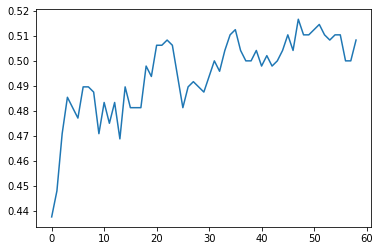

The model with the best accuracy is: %.3f 0.5166666666666667
-------------------------------------------------------

                        SVM MODEL                      
-------------------------------------------------------
                  
        linear          
Accuracy score: 0.560
Accuracy score: 0.558
Accuracy score: 0.560
Accuracy score: 0.562
        poly          
Accuracy score: 0.527
Accuracy score: 0.552
Accuracy score: 0.588
Accuracy score: 0.554
        rbf          
Accuracy score: 0.567
Accuracy score: 0.606
Accuracy score: 0.621
Accuracy score: 0.600
        sigmoid          
Accuracy score: 0.550
Accuracy score: 0.467
Accuracy score: 0.452
Accuracy score: 0.433


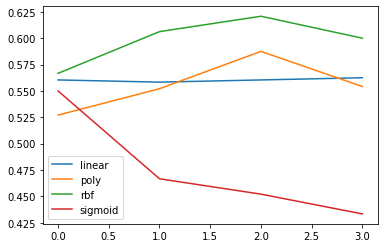

In [26]:
wine_linear_regression(wine)
wine_logistic_regression(wine)
wine_knn(wine, 60)
wine_svm(wine)

In [28]:
# inspect wine data
cars

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [29]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [30]:
# splitting company name 
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,"CompanyName",CompanyName)
cars.drop(['CarName'],axis=1,inplace=True)
# view data after splitting
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
cars['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Spelling mistakes:

maxda = mazda

Nissan = nissan

porsche = porcshce

toyota = toyouta

vokswagen = volkswagen = vw

In [39]:
cars['CompanyName'] = cars['CompanyName'].str.lower()

# replace mistakes
cars['CompanyName'].replace('maxda','mazda', inplace=True)
cars['CompanyName'].replace('porcshce','porsche', inplace=True)
cars['CompanyName'].replace('toyouta','toyota', inplace=True)
cars['CompanyName'].replace('vokswagen','volkswagen', inplace=True)
cars['CompanyName'].replace('vw','volkswagen', inplace=True)

cars['CompanyName'].unique()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [40]:
# duplicate data
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [41]:
# EDA